- Droped the non necessary attributes
- Split Team & Contract in 2 new columns Team and Contract Duration and then droped Team & Contract column
- Remove any non-digit characters from Hits column, convert to integer
- Convert height to inches, convert to integer
- Remove "lbs" from the 'Weight' column, convert to integer
- Convert the 'Date' column to a real date type
- Convert 'Value', 'Wage', 'Release Clause' to numeric. Removed MK and euro sign. Added commas to values so they can be easily interpreted.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import seaborn as sns
import numpy as np

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('fifa21_raw_data.csv', low_memory = False)
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [5]:
data.shape

(18979, 77)

In [6]:
# Remove unnecessary columns
columns_to_drop = ['photoUrl', 'playerUrl', 'ID', 'BOV', 'W/F', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'SM', 'A/W', 'Loan Date End', 'Positions', 'Composure', 'Base Stats']
data = data.drop(columns = columns_to_drop)

In [7]:
data.shape

(18979, 58)

In [8]:
# Check for duplicates
data.duplicated().sum()

1

In [9]:
# Remove duplicated values
data = data.drop_duplicates()

In [10]:
data.head()

,LongName,Nationality,Name,Age,↓OVA,POT,Team & Contract,Height,Weight,foot,BP,Growth,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Hits
0,Lionel Messi,Argentina,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,"5'7""",159lbs,Left,RW,0,"Jul 1, 2004",€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,91,32,35,24,54,6,11,15,14,8,2231,\n372
1,C. Ronaldo dos Santos Aveiro,Portugal,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,"6'2""",183lbs,Right,ST,0,"Jul 10, 2018",€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,84,28,32,24,58,7,11,15,14,11,2221,\n344
2,Jan Oblak,Slovenia,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,"6'2""",192lbs,Right,GK,2,"Jul 16, 2014",€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,57,27,12,18,437,87,92,78,90,90,1413,\n86
3,Kevin De Bruyne,Belgium,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,"5'11""",154lbs,Right,CAM,0,"Aug 30, 2015",€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,186,68,65,53,56,15,13,5,10,13,2304,\n163
4,Neymar da Silva Santos Jr.,Brazil,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,"5'9""",150lbs,Right,LW,0,"Aug 3, 2017",€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,94,35,30,29,59,9,9,15,15,11,2175,\n273


In [11]:
# Remove all \n from the column values
data['Team & Contract'] = data['Team & Contract'].str.replace('\n', '')
data['Team & Contract'].head()

0           FC Barcelona2004 ~ 2021
1               Juventus2018 ~ 2022
2        Atlético Madrid2014 ~ 2023
3        Manchester City2015 ~ 2023
4    Paris Saint-Germain2017 ~ 2022
Name: Team & Contract, dtype: object

In [12]:
# Split the 'Team & Contract' column in 2 new columns
data[['Team', 'Contract Duration']] = data['Team & Contract'].str.extract(r'(\D+)(\d+\s*~\s*\d+)')
# Drop Team & Contract column after spliting
data = data.drop('Team & Contract', axis=1)

In [13]:
# Remove any non-digit characters from Hits column using regex
data['Hits'] = data['Hits'].str.replace('[^\d]', '', regex=True)
# Convert Hits to integer data type
data['Hits'] = data['Hits'].astype(int)
data['Hits'].head()

0    372
1    344
2     86
3    163
4    273
Name: Hits, dtype: int64

In [14]:
data.head()

,LongName,Nationality,Name,Age,↓OVA,POT,Height,Weight,foot,BP,Growth,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Hits,Team,Contract Duration
0,Lionel Messi,Argentina,L. Messi,33,93,93,"5'7""",159lbs,Left,RW,0,"Jul 1, 2004",€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,91,32,35,24,54,6,11,15,14,8,2231,372,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,Cristiano Ronaldo,35,92,92,"6'2""",183lbs,Right,ST,0,"Jul 10, 2018",€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,84,28,32,24,58,7,11,15,14,11,2221,344,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,J. Oblak,27,91,93,"6'2""",192lbs,Right,GK,2,"Jul 16, 2014",€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,57,27,12,18,437,87,92,78,90,90,1413,86,Atlético Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,K. De Bruyne,29,91,91,"5'11""",154lbs,Right,CAM,0,"Aug 30, 2015",€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,186,68,65,53,56,15,13,5,10,13,2304,163,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,Neymar Jr,28,91,91,"5'9""",150lbs,Right,LW,0,"Aug 3, 2017",€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,94,35,30,29,59,9,9,15,15,11,2175,273,Paris Saint-Germain,2017 ~ 2022


In [15]:
data['Height'].head()

0     5'7"
1     6'2"
2     6'2"
3    5'11"
4     5'9"
Name: Height, dtype: object

In [16]:
# Convert height to inches
data['Height (inches)'] = data['Height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1].replace('"', '')))
# Drop Height column
data = data.drop('Height', axis=1)

In [17]:
data['Weight'].head()

0    159lbs
1    183lbs
2    192lbs
3    154lbs
4    150lbs
Name: Weight, dtype: object

In [18]:
# Remove "lbs" from the 'Weight' column
data['Weight (lbs)'] = data['Weight'].str.replace('lbs', '')
# Convert Weight to integer
data['Weight (lbs)'] = data['Weight (lbs)'].astype(int)
# Drop Weight column
data = data.drop('Weight', axis=1)

In [19]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2    Jul 16, 2014
3    Aug 30, 2015
4     Aug 3, 2017
Name: Joined, dtype: object

In [20]:
# Convert the 'Date' column to a real date type
data['Date Joined'] = pd.to_datetime(data['Joined'])
# Drop Joined column
data = data.drop('Joined', axis=1)

In [21]:
data.head()

,LongName,Nationality,Name,Age,↓OVA,POT,foot,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Hits,Team,Contract Duration,Height (inches),Weight (lbs),Date Joined
0,Lionel Messi,Argentina,L. Messi,33,93,93,Left,RW,0,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,91,32,35,24,54,6,11,15,14,8,2231,372,FC Barcelona,2004 ~ 2021,67,159,2004-07-01
1,C. Ronaldo dos Santos Aveiro,Portugal,Cristiano Ronaldo,35,92,92,Right,ST,0,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,84,28,32,24,58,7,11,15,14,11,2221,344,Juventus,2018 ~ 2022,74,183,2018-07-10
2,Jan Oblak,Slovenia,J. Oblak,27,91,93,Right,GK,2,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,57,27,12,18,437,87,92,78,90,90,1413,86,Atlético Madrid,2014 ~ 2023,74,192,2014-07-16
3,Kevin De Bruyne,Belgium,K. De Bruyne,29,91,91,Right,CAM,0,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,186,68,65,53,56,15,13,5,10,13,2304,163,Manchester City,2015 ~ 2023,71,154,2015-08-30
4,Neymar da Silva Santos Jr.,Brazil,Neymar Jr,28,91,91,Right,LW,0,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,94,35,30,29,59,9,9,15,15,11,2175,273,Paris Saint-Germain,2017 ~ 2022,69,150,2017-08-03


In [22]:
data[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M


In [23]:
# Create a function to remove euro sign in the beginning and MK in the end
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    else:
        return None

In [24]:
# Convert values to numeric
data['Value (Euro)'] = data['Value'].apply(convert_value)
data['Wage (Euro)'] = data['Wage'].apply(convert_value)
data['Release Clause (Euro)'] = data['Release Clause'].apply(convert_value)

In [25]:
# Drop columns
drop_columns = ['Value', 'Wage', 'Release Clause']
data = data.drop(drop_columns, axis=1)

In [26]:
data.columns

Index(['LongName', 'Nationality', 'Name', 'Age', '↓OVA', 'POT', 'foot', 'BP',
       'Growth', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Hits',
       'Team', 'Contract Duration', 'Height (inches)', 'Weight (lbs)',
       'Date Joined', 'Value (Euro)', 'Wage (Euro)', 'Release Clause (Euro)'],
      dtype='object')

### Question 1:  Who are the top 10 highest-rated player overall (OVA)?

- Lionel Messi - OVA Rating: 93
- Cristiano Ronaldo - OVA Rating: 92
- Jan Oblak - OVA Rating: 91
- Kevin De Bruyne - OVA Rating: 91
- Neymar da Silva Santos Jr. - OVA Rating: 91
- Robert Lewandowski - OVA Rating: 91
- Sadio Mané - OVA Rating: 90
- Virgil van Dijk - OVA Rating: 90
- Marc-André ter Stegen - OVA Rating: 90
- Mohamed Salah - OVA Rating: 90

#### These players are considered among the top-rated players overall in FIFA 2021, based on their OVA ratings. Lionel Messi holds the highest rating of 93, followed closely by Cristiano Ronaldo with a rating of 92. The remaining players in the list have OVA ratings of 90 or 91, indicating their exceptional skills and performance in the game.

In [27]:
# Sort the DataFrame by OVA (Overall) rating in descending order and select the top 10 players
top_10_players = data.sort_values('↓OVA', ascending=False).head(10)

# Extract the player names and their corresponding OVA ratings
player_names = top_10_players['LongName']
ova_ratings = top_10_players['↓OVA']

In [28]:
# Create a dictionary from the player names and OVA ratings
df1 = {
    'Player': player_names,
    'OVA Rating': ova_ratings
}

# Convert the dictionary into a DataFrame
df_players = pd.DataFrame(df1)

# Display the DataFrame
print(df_players)

                          Player  OVA Rating
0                   Lionel Messi          93
1   C. Ronaldo dos Santos Aveiro          92
2                      Jan Oblak          91
3                Kevin De Bruyne          91
4     Neymar da Silva Santos Jr.          91
5             Robert Lewandowski          91
9                     Sadio Mané          90
10               Virgil van Dijk          90
11         Marc-André ter Stegen          90
8                  Mohamed Salah          90


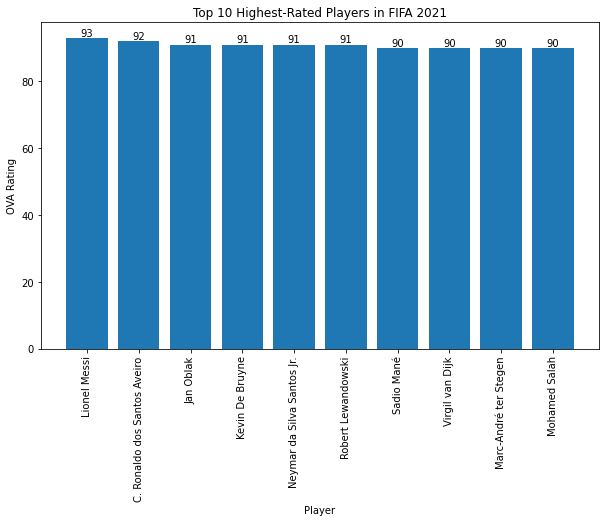

In [29]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(player_names, ova_ratings)
plt.xlabel('Player')
plt.ylabel('OVA Rating')
plt.title('Top 10 Highest-Rated Players in FIFA 2021')
plt.xticks(rotation=90)

# Add numerical values above each bar
for i, rating in enumerate(ova_ratings):
    plt.text(i, rating, str(rating), ha='center', va='bottom')

plt.show()

### Question 2: Who are the top 10 highest-rated player younger than 22 years overall (OVA)? 

- Kylian Mbappé - OVA Rating: 90
- Trent Alexander-Arnold - OVA Rating: 87
- Jadon Sancho - OVA Rating: 87
- Kai Havertz - OVA Rating: 85
- Matthijs de Ligt - OVA Rating: 85
- Gianluigi Donnarumma - OVA Rating: 85
- Erling Haaland - OVA Rating: 84
- Federico Valverde - OVA Rating: 83
- Achraf Hakimi - OVA Rating: 83
- Martin Ødegaard - OVA Rating: 83

#### These players are considered the top-rated players under the age of 22 in FIFA 2021, based on their OVA ratings. Kylian Mbappé tops the list with an OVA rating of 90, showcasing his exceptional skills and potential at such a young age. Other notable young talents like Trent Alexander-Arnold, Jadon Sancho, and Kai Havertz also feature in the list with high OVA ratings, highlighting their promising abilities in the game.

In [30]:
# Filter the DataFrame to include only players younger than 22 years old
young_players = data[data['Age'] < 22]

# Sort the filtered DataFrame by OVA (Overall) rating in descending order and select the top 10 players
top_10_young_players = young_players.sort_values('↓OVA', ascending=False).head(10)

# Extract the player names and their corresponding OVA ratings
player_names = top_10_young_players['LongName']
ova_ratings = top_10_young_players['↓OVA']

In [31]:
# Create a dictionary from the player names and OVA ratings
df2 = {
    'Player': player_names,
    'OVA Rating': ova_ratings
}

# Convert the dictionary into a DataFrame
df_players = pd.DataFrame(df2)

# Display the DataFrame
print(df_players)

                     Player  OVA Rating
6             Kylian Mbappé          90
29   Trent Alexander-Arnold          87
28             Jadon Sancho          87
62              Kai Havertz          85
63         Matthijs de Ligt          85
67     Gianluigi Donnarumma          85
99           Erling Haaland          84
142       Federico Valverde          83
143           Achraf Hakimi          83
154         Martin Ødegaard          83


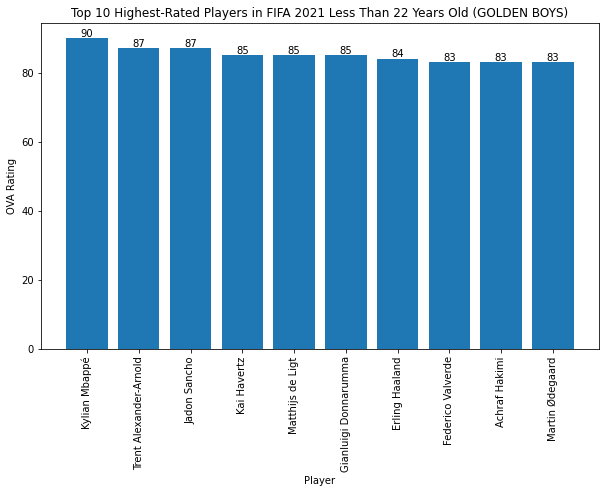

In [32]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(player_names, ova_ratings)
plt.xlabel('Player')
plt.ylabel('OVA Rating')
plt.title('Top 10 Highest-Rated Players in FIFA 2021 Less Than 22 Years Old (GOLDEN BOYS)')
plt.xticks(rotation=90)

# Add numerical values above each bar
for i, rating in enumerate(ova_ratings):
    plt.text(i, rating, str(rating), ha='center', va='bottom')

plt.show()

### Question 3: Which are the top 10 nations with  the highest number of players? Which are the top 10 nations with the highest values of players? 

#### Top 10 Nations with the Highest Number of Players:

- England - 1704 players
- Germany - 1195 players
- Spain - 1065 players
- France - 1003 players
- Argentina - 943 players
- Brazil - 887 players
- Japan - 485 players
- Netherlands - 438 players
- Italy - 387 players
- Sweden - 380 players

#### This list represents the top 10 nations with the highest number of players in the FIFA 2021 dataset. England has the highest number of players, followed by Germany, Spain, and France. These nations have a significant presence in the game, with a large number of players representing them.

#### Top 10 Nations with the Highest Values of Players:

- Spain - €4.2643 billion
- Brazil - €3.91957 billion
- France - €3.41525 billion
- England - €2.81264 billion
- Germany - €2.73952 billion
- Argentina - €2.626585 billion
- Portugal - €1.629455 billion
- Italy - €1.496065 billion
- Netherlands - €1.39044 billion
- Belgium - €1.06495 billion

#### This list represents the top 10 nations with the highest total player values in the FIFA 2021 dataset. Spain leads the list with the highest total value, followed by Brazil, France, and England. These nations have players with high market values, contributing to their overall value dominance in the game.

In [33]:
# Count the number of players for each nationality
nation_counts = data['Nationality'].value_counts()

# Select the top 10 nations with the highest number of players
top_10_nations_counts = nation_counts.head(10)
top_10_nations_counts

England        1704
Germany        1195
Spain          1065
France         1003
Argentina       943
Brazil          887
Japan           485
Netherlands     438
Italy           387
Sweden          380
Name: Nationality, dtype: int64

In [34]:
# Group the data by nationality and calculate the sum of player values for each nationality
nation_values = data.groupby('Nationality')['Value (Euro)'].sum()

# Select the top 10 nations with the highest values of players
top_10_nations_values = nation_values.nlargest(10)
top_10_nations_values

Nationality
Spain          4.264300e+09
Brazil         3.919570e+09
France         3.415250e+09
England        2.812640e+09
Germany        2.739520e+09
Argentina      2.626585e+09
Portugal       1.629455e+09
Italy          1.496065e+09
Netherlands    1.390440e+09
Belgium        1.064950e+09
Name: Value (Euro), dtype: float64

In [35]:
# Convert the values to millions or billions
def format_value(value, _):
    if value >= 1e9:
        return f'{value/1e9:.1f}B'
    elif value >= 1e6:
        return f'{value/1e6:.1f}M'
    else:
        return f'{value:.0f}'

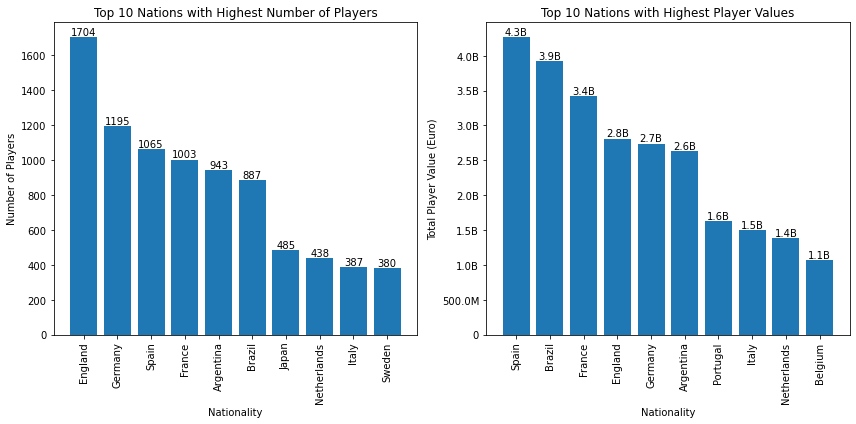

In [36]:
# Plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the bar chart for top 10 nations with highest number of players
ax1.bar(top_10_nations_counts.index, top_10_nations_counts.values)
ax1.set_xlabel('Nationality')
ax1.set_ylabel('Number of Players')
ax1.set_title('Top 10 Nations with Highest Number of Players')
ax1.tick_params(axis='x', rotation=90)

# Add numerical values above each bar
for i, count in enumerate(top_10_nations_counts.values):
    ax1.text(i, count, str(count), ha='center', va='bottom')

# Plotting the bar chart for top 10 nations with highest player values
ax2.bar(top_10_nations_values.index, top_10_nations_values.values)
ax2.set_xlabel('Nationality')
ax2.set_ylabel('Total Player Value (Euro)')
ax2.set_title('Top 10 Nations with Highest Player Values')
ax2.tick_params(axis='x', rotation=90)

# Add formatted numerical values above each bar
for i, value in enumerate(top_10_nations_values.values):
    ax2.text(i, value, format_value(value, _), ha='center', va='bottom')

# Format the y-axis tick labels as millions or billions
ax2.yaxis.set_major_formatter(FuncFormatter(format_value))

plt.tight_layout()
plt.show()

 ### Question 4: Plot the Age Distribution. Which are the top 10 teams with the lowest average age and highest average age?

- Bayern München II - Average Age: 20.76 years
- FC Nordsjælland - Average Age: 20.846154 years
- Barnsley - Average Age: 21.533333 years
- Famalicão - Average Age: 21.56 years
- SC Heerenveen - Average Age: 21.684211 years
- AFC Wimbledon - Average Age: 21.76 years
- FC Twente - Average Age: 21.888889 years
- Toulouse Football Club - Average Age: 22.037037 years
- Chamois Niortais Football Club - Average Age: 22.1 years
- Strømsgodset IF - Average Age: 22.192308 years

#### These teams have the lowest average ages among all the teams. They are composed of relatively younger players, suggesting a focus on developing and nurturing young talents. These teams may prioritize youth development and give opportunities to young players to showcase their skills and potential. The lower average age indicates a potential for future growth and long-term team building strategies.

- Yokohama FC - Average Age: 29.916667 years
- Qingdao Huanghai F.C. - Average Age: 29.904762 years
- Al Fayha - Average Age: 29.2 years
- Sivasspor - Average Age: 29.08 years
- AC Mineros de Guayana - Average Age: 29.04 years
- BB Erzurumspor - Average Age: 28.96 years
- Jorge Wilstermann - Average Age: 28.8 years
- Shanghai Greenland Shenhua FC - Average Age: 28.75 years
- Central Córdoba - Average Age: 28.708333 years
- Wuhan Zall - Average Age: 28.625 years

#### These teams have the highest average ages among all the teams. They are composed of relatively older players, indicating a more experienced and mature team. These teams may prioritize the inclusion of experienced players to provide stability, leadership, and tactical knowledge on the field. The higher average age suggests a focus on established players who bring a wealth of experience to the team.

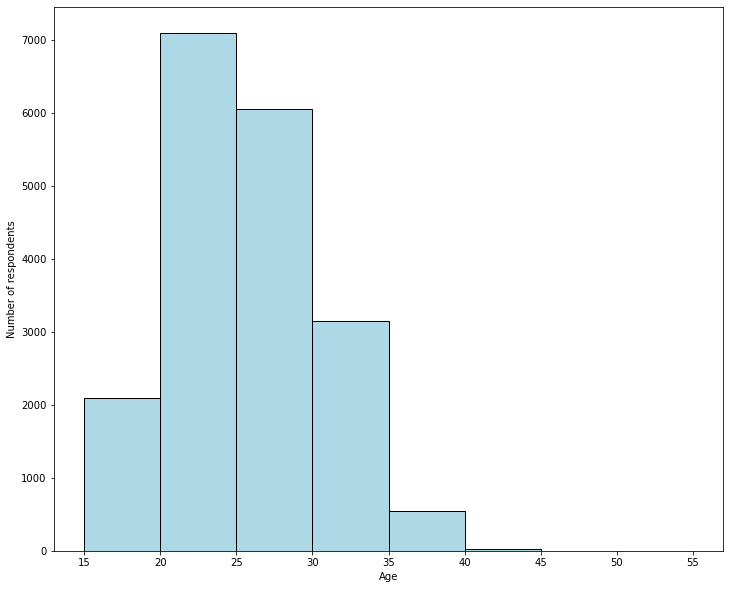

In [37]:
plt.figure(figsize=(12, 10))

plt.xlabel('Age')
plt.ylabel('Number of respondents')

# Plot the histogram with borders
plt.hist(data.Age, bins=np.arange(15, 60, 5), color='lightblue', edgecolor='black')

plt.show()

In [38]:
# Group the data by team and calculate the average age for each team
team_avg_age = data.groupby('Team')['Age'].mean()

# Select the top 10 teams with the lowest average age
top_10_teams_lowest_age = team_avg_age.nsmallest(10)
top_10_teams_lowest_age

Team
Bayern München II                 20.760000
FC Nordsjælland                   20.846154
Barnsley                          21.533333
Famalicão                         21.560000
SC Heerenveen                     21.684211
AFC Wimbledon                     21.760000
FC Twente                         21.888889
Toulouse Football Club            22.037037
Chamois Niortais Football Club    22.100000
Strømsgodset IF                   22.192308
Name: Age, dtype: float64

In [39]:
# Select the top 10 teams with the highest average age
top_10_teams_largest_age = team_avg_age.nlargest(10)
top_10_teams_largest_age

Team
Yokohama FC                      29.916667
Qingdao Huanghai F.C.            29.904762
Al Fayha                         29.200000
Sivasspor                        29.080000
AC Mineros de Guayana            29.040000
BB Erzurumspor                   28.960000
Jorge Wilstermann                28.800000
Shanghai Greenland Shenhua FC    28.750000
Central Córdoba                  28.708333
Wuhan Zall                       28.625000
Name: Age, dtype: float64

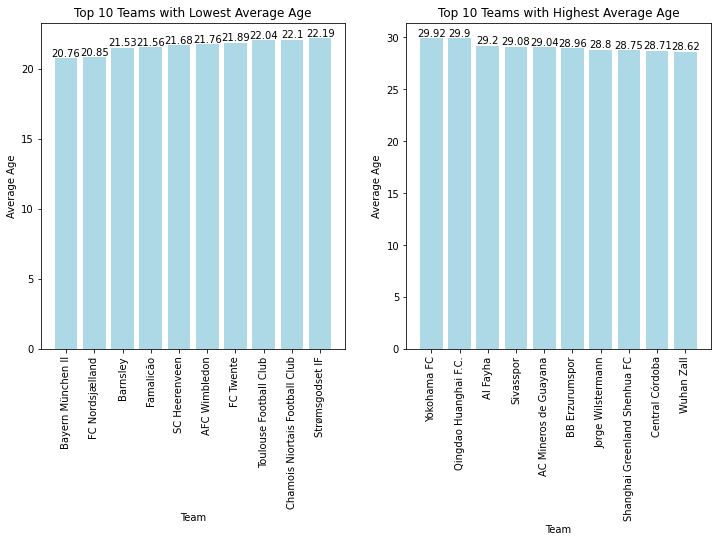

In [40]:
# Plotting the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the top 10 teams with the lowest average age
ax1.bar(top_10_teams_lowest_age.index, top_10_teams_lowest_age.values, color='lightblue')
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Age')
ax1.set_title('Top 10 Teams with Lowest Average Age')

# Add numerical values above each bar in the first subplot
for i, age in enumerate(top_10_teams_lowest_age.values):
    ax1.text(i, age, str(round(age, 2)), ha='center', va='bottom')

# Plotting the top 10 teams with the highest average age
ax2.bar(top_10_teams_largest_age.index, top_10_teams_largest_age.values, color='lightblue')
ax2.set_xlabel('Team')
ax2.set_ylabel('Average Age')
ax2.set_title('Top 10 Teams with Highest Average Age')

# Add numerical values above each bar in the second subplot
for i, age in enumerate(top_10_teams_largest_age.values):
    ax2.text(i, age, str(round(age, 2)), ha='center', va='bottom')

# Rotate the x-axis labels for better readability if needed
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)


plt.show()

### Question 5: How many players shot with the left and how many with the right leg? 

#### There are 14,444 players who shoot with their right leg and 4,534 players who shoot with their left leg.

#### This indicates that the majority of players in the dataset shoot with their right leg, with a significantly higher number compared to those who shoot with their left leg. Right-footed players are more common in football.

In [41]:
# Count the number of players by preferred foot
foot_counts = data['foot'].value_counts()
foot_counts


Right    14444
Left      4534
Name: foot, dtype: int64

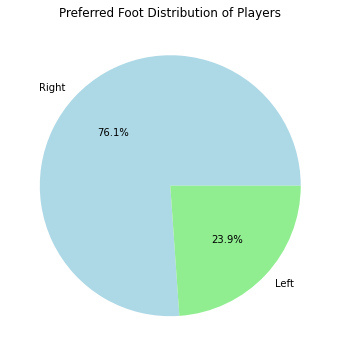

In [42]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(foot_counts, labels=foot_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Preferred Foot Distribution of Players')

plt.show()

### Question 6: Find the number of players in each position

- CB (Center Back): 3,685 players
- ST (Striker): 2,680 players
- CAM (Center Attacking Midfielder): 2,299 players
- GK (Goalkeeper): 2,075 players
- RM (Right Midfielder): 1,611 players
- CDM (Center Defensive Midfielder): 1,445 players
- LB (Left Back): 1,086 players
- RB (Right Back): 1,079 players
- CM (Center Midfielder): 1,047 players
- LM (Left Midfielder): 871 players
- RW (Right Winger): 298 players
- RWB (Right Wing Back): 277 players
- LWB (Left Wing Back): 261 players
- LW (Left Winger): 186 players
- CF (Center Forward): 78 players

#### These numbers represent the count of players in each respective position in the FIFA 2021 dataset. It provides an overview of the distribution of players across different positions. The position with the highest number of players is Center Back (CB), followed by Striker (ST) and Center Attacking Midfielder (CAM). The position with the lowest number of players is Center Forward (CF).

In [43]:
# Count the number of players in each position
position_counts = data['BP'].value_counts()
position_counts

CB     3685
ST     2680
CAM    2299
GK     2075
RM     1611
CDM    1445
LB     1086
RB     1079
CM     1047
LM      871
RW      298
RWB     277
LWB     261
LW      186
CF       78
Name: BP, dtype: int64

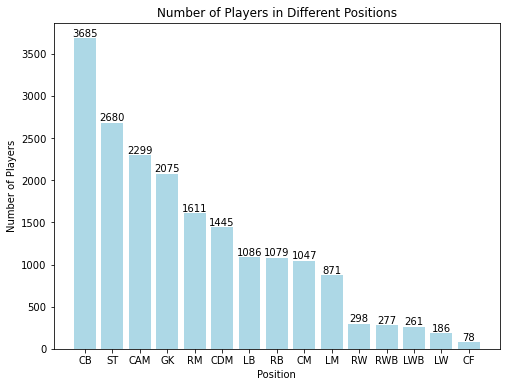

In [44]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(position_counts.index, position_counts.values, color='lightblue')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players in Different Positions')

# Add the numbers on top of each bar
for i, count in enumerate(position_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### Question 7: Which are the top 10 teams with the highest number of players?

- Brighton & Hove Albion - 33 players
- West Ham United - 33 players
- Newcastle United - 33 players
- Liverpool - 33 players
- Burnley - 33 players
- Chelsea - 33 players
- Spezia - 33 players
- Leicester City - 33 players
- Everton - 32 players
- VfB Stuttgart - 32 players

#### These teams have the highest number of players among all the teams in the dataset. It suggests that these teams may have larger squads or a higher number of registered players. The larger squad size could be indicative of the team's depth and flexibility in terms of player selection and tactical options.

In [45]:
# Count the number of players for each team
team_player_counts = data['Team'].value_counts()

# Select the top 10 teams with the highest number of players
top_10_teams = team_player_counts.head(10)
top_10_teams

Brighton & Hove Albion    33
West Ham United           33
Newcastle United          33
Liverpool                 33
Burnley                   33
Chelsea                   33
Spezia                    33
Leicester City            33
Everton                   32
VfB Stuttgart             32
Name: Team, dtype: int64

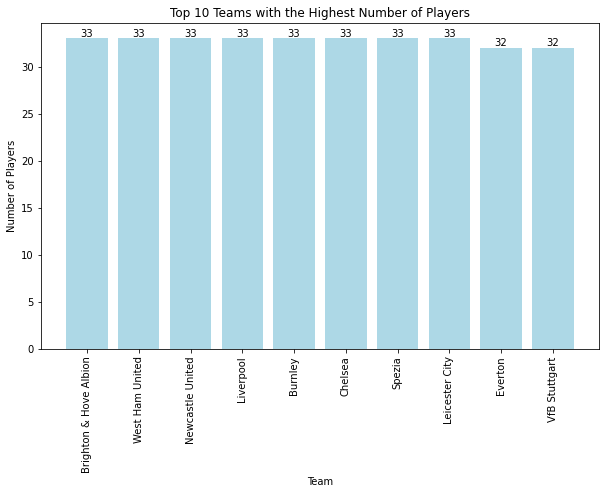

In [46]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams.index, top_10_teams.values, color='lightblue')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Top 10 Teams with the Highest Number of Players')

plt.xticks(rotation=90)

# Add the numbers on top of each bar
for i, count in enumerate(top_10_teams.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

### Question 8: Which are top 10 teams pays the most? Which are top 10 teams that have the most expensive players?

#### Top 10 Teams that Pay the Most:

- Real Madrid - €4,678,000
- FC Barcelona - €4,073,000
- Manchester City - €3,629,000
- Liverpool - €3,026,000
- Manchester United - €2,961,000
- Chelsea - €2,533,000
- Inter - €2,315,000
- Tottenham Hotspur - €2,263,000
- Paris Saint-Germain - €2,203,000
- Juventus - €2,036,000

#### These teams have the highest total wages or salaries paid to their players. It suggests that these teams have significant financial resources to attract and retain top-quality players, which often comes with higher salary expenditures.

#### Top 10 Teams with the Most Expensive Players:

- Liverpool - €820,435,000
- Manchester City - €752,650,000
- Real Madrid - €747,475,000
- FC Bayern München - €647,000,000
- FC Barcelona - €642,325,000
- Paris Saint-Germain - €618,125,000
- Manchester United - €582,030,000
- Chelsea - €571,000,000
- Atlético Madrid - €521,100,000
- Tottenham Hotspur - €516,975,000

#### These teams have the highest total player values, indicating that they possess a roster of players with high market valuations. It suggests that these teams have made significant investments in acquiring talented and valuable players, which can contribute to their overall success on the field.

In [47]:
# Group the data by team and calculate the sum of wages for each team
team_wage = data.groupby('Team')['Wage (Euro)'].sum()

# Select the top 10 teams that pay the most in wages
top_10_teams_wage = team_wage.nlargest(10)
top_10_teams_wage

Team
Real Madrid            4678000.0
FC Barcelona           4073000.0
Manchester City        3629000.0
Liverpool              3026000.0
Manchester United      2961000.0
Chelsea                2533000.0
Inter                  2315000.0
Tottenham Hotspur      2263000.0
Paris Saint-Germain    2203000.0
Juventus               2036000.0
Name: Wage (Euro), dtype: float64

In [48]:
# Group the data by team and calculate the sum of values for each team
team_value = data.groupby('Team')['Value (Euro)'].sum()

# Select the top 10 teams with the most expensive players
top_10_teams_value = team_value.nlargest(10)
top_10_teams_value

Team
Liverpool              820435000.0
Manchester City        752650000.0
Real Madrid            747475000.0
FC Bayern München      647000000.0
FC Barcelona           642325000.0
Paris Saint-Germain    618125000.0
Manchester United      582030000.0
Chelsea                571000000.0
Atlético Madrid        521100000.0
Tottenham Hotspur      516975000.0
Name: Value (Euro), dtype: float64

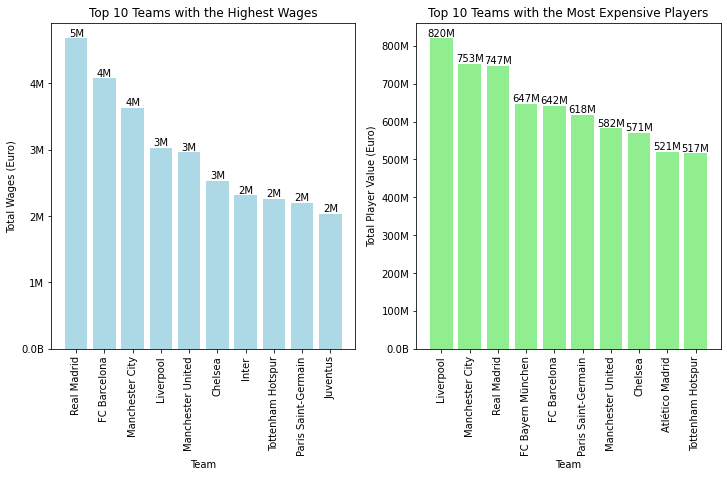

In [49]:
# Plotting the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the top 10 teams with the highest wages
axes[0].bar(top_10_teams_wage.index, top_10_teams_wage.values, color='lightblue')

# Format the y-axis labels with millions or billions
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/10**6:.0f}M' if x >= 1e6 else f'{x/10**9:.1f}B'))
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Total Wages (Euro)')
axes[0].set_title('Top 10 Teams with the Highest Wages')
axes[0].tick_params(axis='x', rotation=90)

# Add the numbers on top of each bar
for i, value in enumerate(top_10_teams_wage.values):
    axes[0].text(i, value, f'{value/10**6:.0f}M' if value >= 1e6 else f'{value/10**9:.1f}B', ha='center', va='bottom')

    
# Plotting the top 10 teams with the most expensive players
axes[1].bar(top_10_teams_value.index, top_10_teams_value.values, color='lightgreen')

# Format the y-axis labels with millions or billions
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/10**6:.0f}M' if x >= 1e6 else f'{x/10**9:.1f}B'))
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Total Player Value (Euro)')
axes[1].set_title('Top 10 Teams with the Most Expensive Players')
axes[1].tick_params(axis='x', rotation=90)

# Add the numbers on top of each bar
for i, value in enumerate(top_10_teams_value.values):
    axes[1].text(i, value, f'{value/10**6:.0f}M' if value >= 1e6 else f'{value/10**9:.1f}B', ha='center', va='bottom')

# Display the subplots
plt.show()

### Question 9: Plot the distribution for the height and weight. Are there any noticeble trends or differences between the players position?


#### For Heights
- Goalkeepers (GK) tend to have the highest average height compared to other positions. This is because height is advantageous for goalkeepers in reaching and blocking shots, as well as commanding the penalty area during set pieces.
- Center Backs (CB) also have relatively higher average heights compared to other positions. This is because they are often responsible for aerial duels and marking tall opposing forwards. Height provides an advantage in winning headers and defending against high crosses.
- Strikers (ST) tend to have slightly higher average heights as well. This can be beneficial for winning aerial duels, holding up the ball, and competing against defenders in physical battles.
- Midfield positions such as Central Defensive Midfielders (CDM), Central Attacking Midfielders (CAM), and Central Midfielders (CM) have relatively lower average heights compared to defenders and strikers. These positions focus more on technical skills, agility, and tactical awareness rather than relying heavily on physical presence.
- Full Backs (LB, RB) and Wingers (LM, LW, RM, RW) fall within a similar height range, with slightly lower average heights compared to defenders and strikers. These positions require speed, agility, and the ability to make quick movements, and being slightly shorter can enhance their agility and quickness.

#### For Weights
- Goalkeepers (GK) tend to have the highest average weight compared to other positions. This makes sense as goalkeepers require more physical presence and strength to protect the goal.
- Center Backs (CB) also have relatively higher average weights compared to other positions. This is because they are typically responsible for defending against opposing forwards and need to possess physical strength and aerial ability.
- Strikers (ST) tend to have higher average weights as well. This is likely because they often engage in physical battles with defenders and need strength to hold up the ball and compete for aerial duels.
- Midfield positions such as Central Defensive Midfielders (CDM), Central Attacking Midfielders (CAM), and Central Midfielders (CM) have relatively lower average weights compared to defenders and strikers. These positions require more agility, technical skills, and tactical awareness rather than pure physicality.
- Full Backs (LB, RB) and Wingers (LM, LW, RM, RW) fall within a similar weight range, with slightly lower average weights compared to defenders and strikers. These positions emphasize speed, agility, and crossing ability, and players in these positions may focus more on endurance and quickness rather than sheer strength.

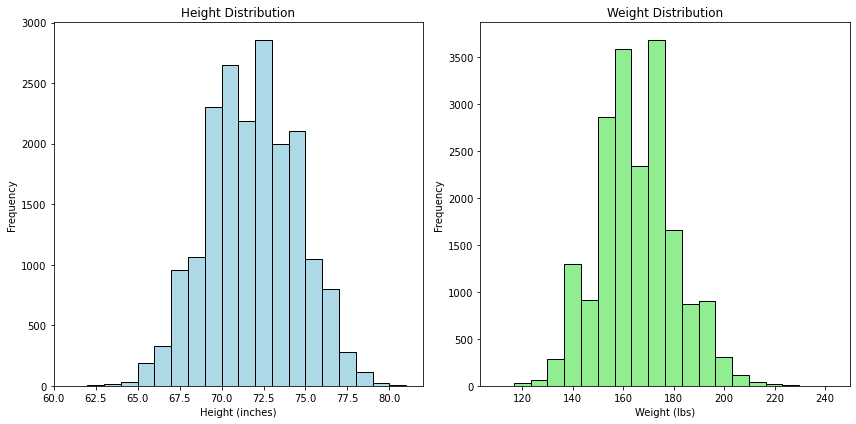

In [50]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for height
axes[0].hist(data['Height (inches)'], bins=20, color='lightblue', edgecolor='black')
axes[0].set_xlabel('Height (inches)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Height Distribution')

# Plot histogram for weight
axes[1].hist(data['Weight (lbs)'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Weight (lbs)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Weight Distribution')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
height_stats = data.groupby('BP')['Height (inches)'].describe()
height_stats

,count,mean,std,min,25%,50%,75%,max
BP,,,,,,,,
CAM,2299.0,69.600261,2.171462,61.0,68.0,70.0,71.0,76.0
CB,3685.0,73.235821,1.931374,65.0,72.0,73.0,74.0,80.0
CDM,1445.0,70.935640,2.255344,64.0,69.0,71.0,72.0,78.0
CF,78.0,69.705128,2.374699,63.0,68.0,70.0,71.0,75.0
CM,1047.0,70.561605,2.179291,62.0,69.0,70.0,72.0,77.0
GK,2075.0,74.166747,1.901670,67.0,73.0,74.0,75.0,81.0
LB,1086.0,70.250460,1.979591,64.0,69.0,70.0,72.0,77.0
LM,871.0,69.450057,2.118766,63.0,68.0,70.0,71.0,76.0
LW,186.0,69.295699,2.146948,62.0,68.0,69.0,71.0,74.0


In [52]:
# Group the data by position and calculate descriptive statistics for weight
weight_stats = data.groupby('BP')['Weight (lbs)'].describe()
weight_stats

,count,mean,std,min,25%,50%,75%,max
BP,,,,,,,,
CAM,2299.0,155.067856,12.268419,119.0,148.0,154.0,163.0,203.0
CB,3685.0,174.780733,12.605912,121.0,165.0,174.0,183.0,223.0
CDM,1445.0,163.993772,12.582056,119.0,154.0,165.0,172.0,216.0
CF,78.0,161.102564,13.337370,132.0,150.5,161.0,173.5,190.0
CM,1047.0,160.964661,12.295583,121.0,154.0,161.0,170.0,198.0
GK,2075.0,180.175422,13.857870,141.0,172.0,179.0,190.0,236.0
LB,1086.0,159.721915,11.842749,110.0,152.0,159.0,168.0,198.0
LM,871.0,155.812859,12.190561,121.0,148.0,154.0,165.0,190.0
LW,186.0,155.569892,12.785463,130.0,146.0,154.0,163.0,190.0


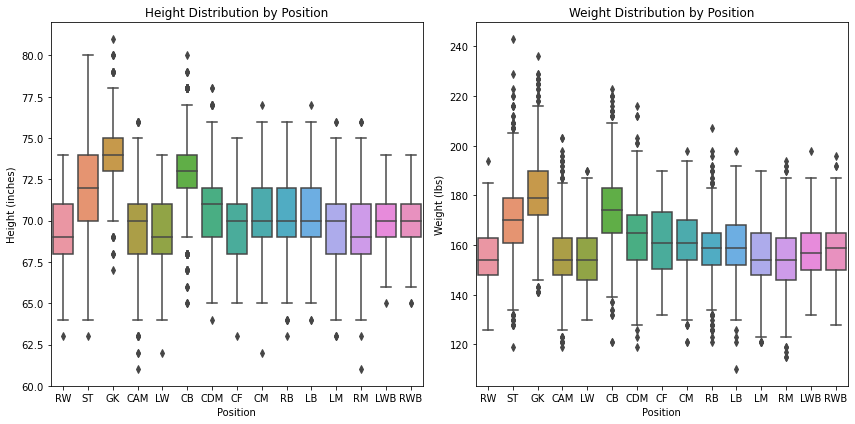

In [53]:
# Create subplots for the boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the boxplot for height
sns.boxplot(x='BP', y='Height (inches)', data=data, ax=axes[0])
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Height (inches)')
axes[0].set_title('Height Distribution by Position')

# Plot the boxplot for weight
sns.boxplot(x='BP', y='Weight (lbs)', data=data, ax=axes[1])
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Weight (lbs)')
axes[1].set_title('Weight Distribution by Position')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()